In [ ]:
#conda install psycopg2

TOPICS:
1. Predict the future sales volume and price of brands in different locations(states), in order to provide stocking and pricing strategies.<br>
2. Seasonality of the store sales in different state saledate, supply chain management, in different type of product<br>
3. Return and purchase rate of different products<br>
4. Inflation trends through years in stores by different products<br>


In [1]:
import psycopg2
import pandas as pd

# Connection parameters
host = "pg.analytics.northwestern.edu"
port = "5432"
database = "everything2023"
user = ""
password = ""

# Establish a connection to the database
conn = psycopg2.connect(
    host=host,
    port=port,
    database=database,
    user=user,
    password=password
)

In [2]:
cursor = conn.cursor()
sql_query = "SELECT * FROM group_13.deptinfo;"
cursor.execute(sql_query)
deptinfo = pd.read_sql_query(sql_query, conn)

cursor = conn.cursor()
sql_query2 = "SELECT * FROM group_13.trnsact TABLESAMPLE SYSTEM(10);"
cursor.execute(sql_query2)
trnsact = pd.read_sql_query(sql_query2, conn)

cursor = conn.cursor()
sql_query3 = "SELECT * FROM group_13.skstinfo;"
cursor.execute(sql_query3)
skstinfo = pd.read_sql_query(sql_query3, conn)
skstinfo.head()

cursor = conn.cursor()
sql_query4 = "SELECT * FROM group_13.strinfo;"
cursor.execute(sql_query4)
strinfo = pd.read_sql_query(sql_query4, conn)

cursor = conn.cursor()
sql_query5 = "SELECT * FROM group_13.skuinfo2;"
cursor.execute(sql_query5)
skuinfo = pd.read_sql_query(sql_query5, conn)

conn.close()

In [3]:
skstinfo

,SKU,STORE,COST,RETAIL,unknown
0,3,102,123.36,440.00,0
1,3,103,123.36,440.00,0
2,3,104,123.36,440.00,0
3,3,202,123.36,440.00,0
4,3,203,123.36,440.00,0
...,...,...,...,...,...
39230141,9999997,2007,15.00,19.50,0
39230142,9999997,2707,15.00,9.75,0
39230143,9999997,3307,15.00,19.50,0
39230144,9999997,7507,15.00,19.50,0


In [4]:
skuinfo.head()

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND
0,0,1,2,3,4,5,6,7,8,9
1,3,6505,113,400000003000,00 F55KT2,WHISPERWHITE,P8EA,1,5119207,TURNBURY
2,4,8101,002,400000004000,22 615CZ4,SPEARMI,S,1,3311144,C A SPOR
3,5,7307,003,400000005000,7LBS 245-01,34 SILVER,KING,1,5510554,BEAU IDE
4,8,3404,00B,400000008000,622 F05H84,MORNING MI,2T,1,2912827,HARTSTRI


In [5]:
deptinfo.head()

,DEPT,DEPTDESC,Unknow
0,800,CLINIQUE,0
1,801,LESLIE,0
2,1100,GARY F,0
3,1107,JACQUES,0
4,1202,CABERN,0


In [6]:
trnsact

,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC,Unknow
0,387,9806,823,77700,191100910,2005-01-14,P,1,79.0,79.00,79.00,360700007,696,0
1,391,203,360,6100,109800320,2004-09-03,P,1,56.0,56.00,56.00,687600007,680,0
2,391,503,250,600,0,2004-08-16,P,1,56.0,14.00,14.00,222900004,680,0
3,397,303,910,6100,544100323,2004-08-21,P,1,32.5,8.13,8.13,557900008,205,0
4,398,6902,140,3000,220804694,2005-08-27,P,1,100.0,100.00,100.00,102000018,661,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12097396,9999974,7002,420,3300,0,2005-07-01,P,1,82.0,59.99,59.99,567200116,290,0
12097397,9999974,7102,130,3300,0,2005-05-19,P,1,82.0,82.00,82.00,70200069,290,0
12097398,9999974,7202,210,1400,479607345,2005-08-03,P,1,82.0,41.00,41.00,853800085,290,0
12097399,9999974,7202,210,2200,479607345,2005-08-11,R,1,82.0,41.00,41.00,509100090,290,0


In [7]:
strinfo.head()

,store,city,state,zip,x
0,2,ST. PETERSBURG,FL,33710,0
1,3,ST. LOUIS,MO,63126,0
2,4,LITTLE ROCK,AR,72201,0
3,7,FORT WORTH,TX,76137,0
4,9,TEMPE,AZ,85281,0


## Clean Data

#### Drop the last column:

In [8]:
# Drop unknow column (the last column):
deptinfo.drop(columns=["Unknow"],inplace=True)
deptinfo.head()

,DEPT,DEPTDESC
0,800,CLINIQUE
1,801,LESLIE
2,1100,GARY F
3,1107,JACQUES
4,1202,CABERN


In [9]:
# Drop the last unknown column:
trnsact.drop(columns=["Unknow"],inplace=True)
trnsact

,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,INTERID,MIC
0,387,9806,823,77700,191100910,2005-01-14,P,1,79.0,79.00,79.00,360700007,696
1,391,203,360,6100,109800320,2004-09-03,P,1,56.0,56.00,56.00,687600007,680
2,391,503,250,600,0,2004-08-16,P,1,56.0,14.00,14.00,222900004,680
3,397,303,910,6100,544100323,2004-08-21,P,1,32.5,8.13,8.13,557900008,205
4,398,6902,140,3000,220804694,2005-08-27,P,1,100.0,100.00,100.00,102000018,661
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12097396,9999974,7002,420,3300,0,2005-07-01,P,1,82.0,59.99,59.99,567200116,290
12097397,9999974,7102,130,3300,0,2005-05-19,P,1,82.0,82.00,82.00,70200069,290
12097398,9999974,7202,210,1400,479607345,2005-08-03,P,1,82.0,41.00,41.00,853800085,290
12097399,9999974,7202,210,2200,479607345,2005-08-11,R,1,82.0,41.00,41.00,509100090,290


In [10]:
# Drop the last unknown column:
skstinfo.drop(columns=["unknown"],inplace=True)
skstinfo

,SKU,STORE,COST,RETAIL
0,3,102,123.36,440.00
1,3,103,123.36,440.00
2,3,104,123.36,440.00
3,3,202,123.36,440.00
4,3,203,123.36,440.00
...,...,...,...,...
39230141,9999997,2007,15.00,19.50
39230142,9999997,2707,15.00,9.75
39230143,9999997,3307,15.00,19.50
39230144,9999997,7507,15.00,19.50


In [11]:
# Drop the last unknown column:
strinfo.drop(columns=['x'],inplace=True)
strinfo

,store,city,state,zip
0,2,ST. PETERSBURG,FL,33710
1,3,ST. LOUIS,MO,63126
2,4,LITTLE ROCK,AR,72201
3,7,FORT WORTH,TX,76137
4,9,TEMPE,AZ,85281
...,...,...,...,...
448,9808,GILBERT,AZ,85233
449,9812,METAIRIE,LA,70006
450,9900,LITTLE ROCK,AR,72201
451,9906,LITTLE ROCK,AR,72201


In [12]:
strinfo.columns = ['STORE','CITY','STATE','ZIP']
strinfo

,STORE,CITY,STATE,ZIP
0,2,ST. PETERSBURG,FL,33710
1,3,ST. LOUIS,MO,63126
2,4,LITTLE ROCK,AR,72201
3,7,FORT WORTH,TX,76137
4,9,TEMPE,AZ,85281
...,...,...,...,...
448,9808,GILBERT,AZ,85233
449,9812,METAIRIE,LA,70006
450,9900,LITTLE ROCK,AR,72201
451,9906,LITTLE ROCK,AR,72201


#### Check Missing Value:

In [13]:
strinfo.isna().sum()

STORE    0
CITY     0
STATE    0
ZIP      0
dtype: int64

In [14]:
deptinfo.isna().sum()

DEPT        0
DEPTDESC    0
dtype: int64

In [15]:
trnsact.isna().sum()

SKU         0
STORE       0
REGISTER    0
TRANNUM     0
SEQ         0
SALEDATE    0
STYPE       0
QUANTITY    0
ORGPRICE    0
SPRICE      0
AMT         0
INTERID     0
MIC         0
dtype: int64

In [16]:
skstinfo.isna().sum()

SKU       0
STORE     0
COST      0
RETAIL    0
dtype: int64

In [17]:
skuinfo.isna().sum()

SKU         0
DEPT        0
CLASSID     0
UPC         0
STYLE       0
COLOR       0
SIZE        0
PACKSIZE    0
VENDOR      0
BRAND       0
dtype: int64

### strinfo:

array([[<AxesSubplot:title={'center':'STORE'}>,
        <AxesSubplot:title={'center':'ZIP'}>]], dtype=object)

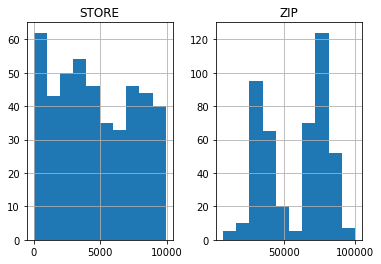

In [18]:
strinfo.hist()

Text(0.5, 1.0, 'State Distribution')

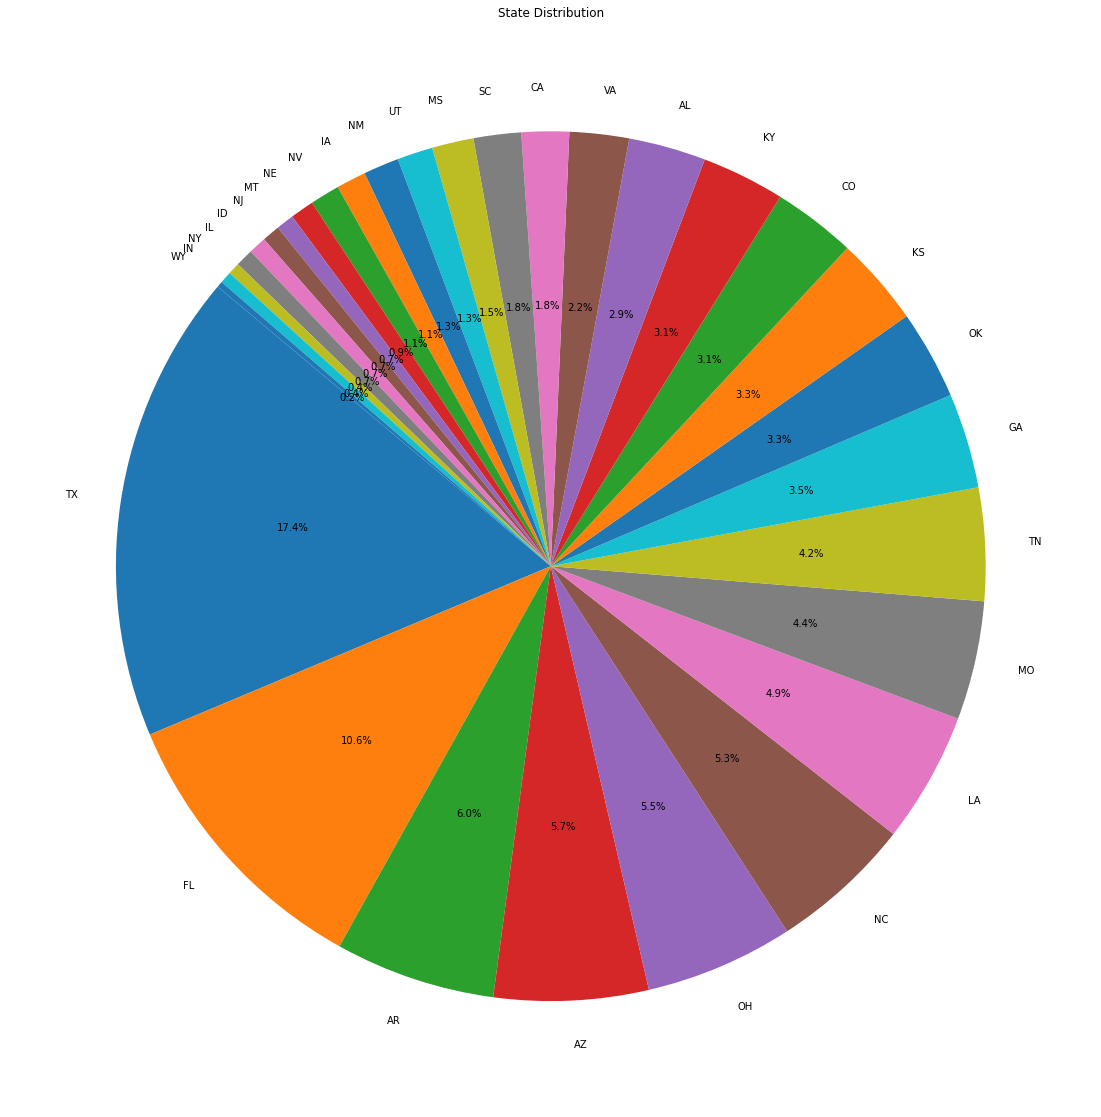

In [19]:
import matplotlib.pyplot as plt

state_counts = strinfo['STATE'].value_counts()
plt.figure(figsize=(20, 20))  # Optional: Set the figure size
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('State Distribution')

### trnsact:

In [20]:
trnsact.dtypes

SKU           int64
STORE         int64
REGISTER      int64
TRANNUM       int64
SEQ           int64
SALEDATE     object
STYPE        object
QUANTITY      int64
ORGPRICE    float64
SPRICE      float64
AMT         float64
INTERID       int64
MIC           int64
dtype: object

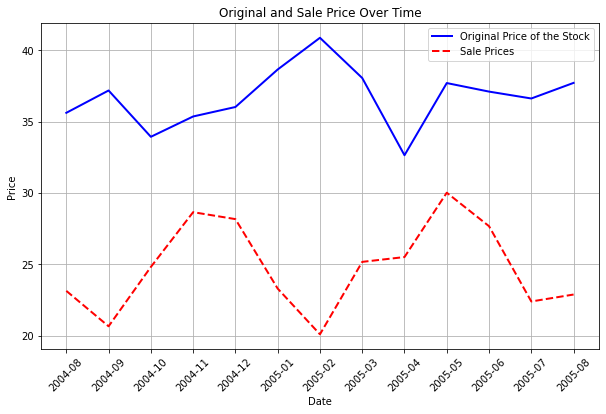

In [21]:
# Assuming 'SALEDATE' is in a datetime format
trnsact['SALEDATE'] = pd.to_datetime(trnsact['SALEDATE'])

# Extract year and month from 'SALEDATE'
trnsact['Year'] = trnsact['SALEDATE'].dt.year
trnsact['Month'] = trnsact['SALEDATE'].dt.month

# Group by year and month and calculate the mean
trnsact_group_price = trnsact.groupby(['Year', 'Month']).mean()

plt.figure(figsize=(10, 6))  # Optional: Set the figure size

# Assuming 'Year' and 'Month' are now separate columns
date_labels = [f"{year}-{month:02d}" for year, month in zip(trnsact_group_price.index.get_level_values('Year'), trnsact_group_price.index.get_level_values('Month'))]

plt.plot(date_labels, trnsact_group_price['ORGPRICE'], label='Original Price of the Stock', color='blue', linestyle='-', linewidth=2)
plt.plot(date_labels, trnsact_group_price['SPRICE'], label='Sale Prices', color='red', linestyle='--', linewidth=2)

# Add labels and a legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Original and Sale Price Over Time')
plt.legend()

# Display the line chart
plt.grid(True)  # Optional: Display grid lines
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.show()


In [22]:
trnsact.columns

Index(['SKU', 'STORE', 'REGISTER', 'TRANNUM', 'SEQ', 'SALEDATE', 'STYPE',
       'QUANTITY', 'ORGPRICE', 'SPRICE', 'AMT', 'INTERID', 'MIC', 'Year',
       'Month'],
      dtype='object')

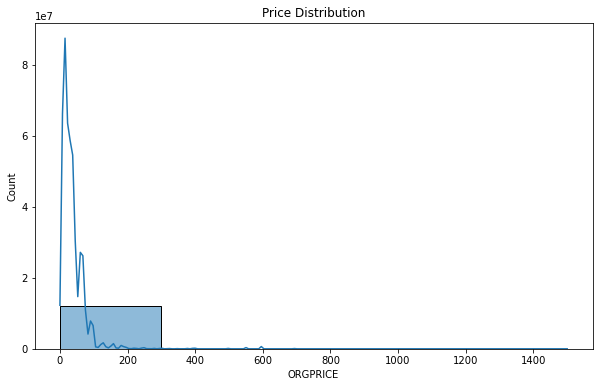

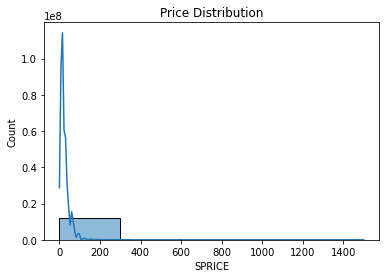

In [23]:
import seaborn as sns
# Data Distribution and Visualization
plt.figure(figsize=(10, 6))
sns.histplot(trnsact['ORGPRICE'], bins=5, kde=True)
plt.title('Price Distribution')
plt.show()
sns.histplot(trnsact['SPRICE'], bins=5, kde=True)
plt.title('Price Distribution')
plt.show()

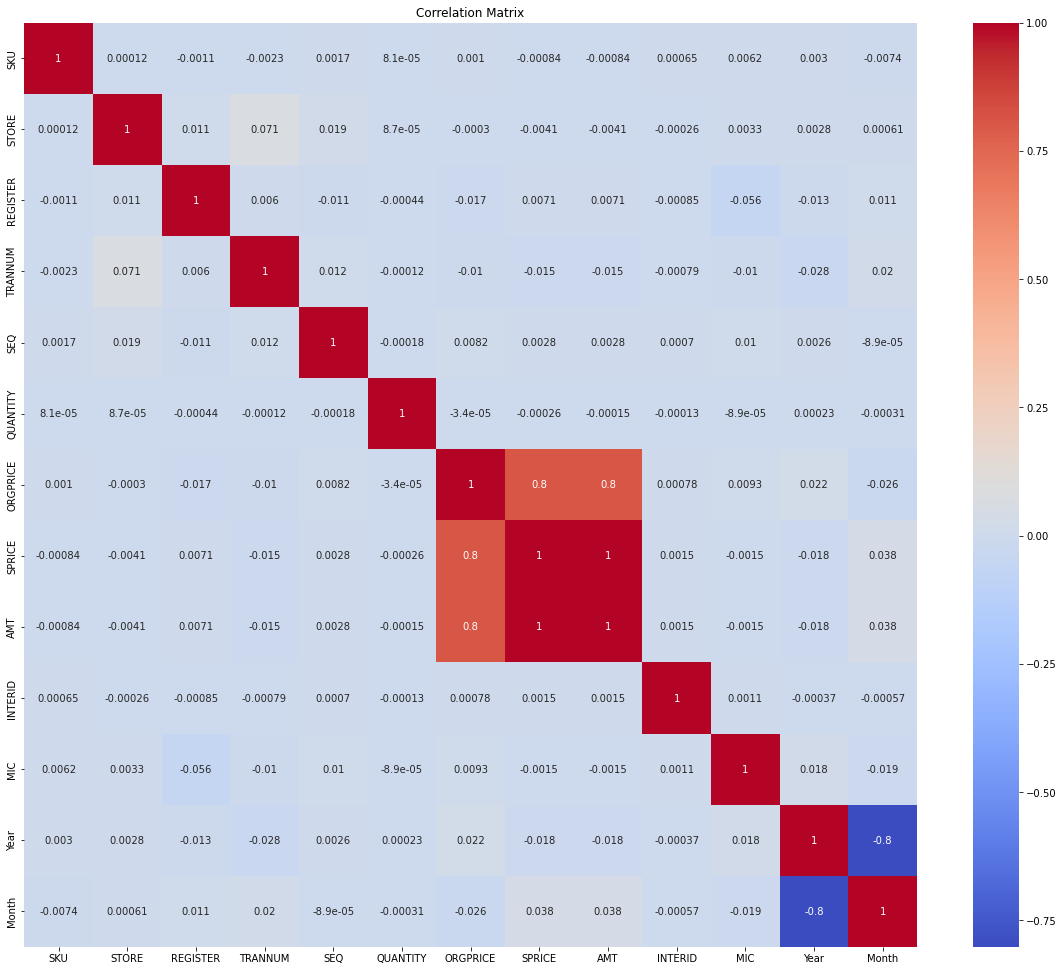

In [24]:
# Correlation Analysis
correlation_matrix = trnsact.corr()
plt.figure(figsize=(20, 17))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Merge Datasets Based on Topic 1:

In [25]:
skuinfo['SKU'] = skuinfo['SKU'].astype(int)
skuinfo['DEPT'] = skuinfo['DEPT'].astype(int)
skuinfo['UPC'] = skuinfo['UPC'].astype(int)
skuinfo['PACKSIZE'] = skuinfo['PACKSIZE'].astype(int)
skuinfo['VENDOR'] = skuinfo['VENDOR'].astype(int)

skuinfo.dtypes

SKU          int64
DEPT         int64
CLASSID     object
UPC          int64
STYLE       object
COLOR       object
SIZE        object
PACKSIZE     int64
VENDOR       int64
BRAND       object
dtype: object

In [26]:
merge_table = pd.merge(trnsact, skuinfo, on='SKU', how='inner')
merge_table = pd.merge(merge_table, skstinfo, on=['SKU', 'STORE'], how='inner')
merge_table

,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,...,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND,COST,RETAIL
0,387,9806,823,77700,191100910,2005-01-14,P,1,79.0,79.00,...,913,400000387000,74017,BROWN,110M,1,5016699,TIMBERLA,38.00,79.00
1,391,203,360,6100,109800320,2004-09-03,P,1,56.0,56.00,...,002,400000391000,30 EJMU49,N RDSE/ONX,M,1,3313116,EMMA JAM,22.14,56.00
2,398,6902,140,3000,220804694,2005-08-27,P,1,100.0,100.00,...,354,400000398000,939053,ROYAL,16,1,6913116,K STUDIO,46.75,100.00
3,418,1502,290,1400,631706034,2004-10-06,R,1,39.0,9.75,...,224,400000418000,306L44,NAVY FABRI,085M,1,10903,BROWN SH,14.00,5.99
4,418,1502,740,3200,0,2005-02-17,P,1,39.0,5.99,...,224,400000418000,306L44,NAVY FABRI,085M,1,10903,BROWN SH,14.00,5.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6853729,9999974,7002,420,3300,0,2005-07-01,P,1,82.0,59.99,...,726,400009974999,G50171,NAVY MULTI,10,1,9212766,GABAR IN,18.00,41.00
6853730,9999974,7102,130,3300,0,2005-05-19,P,1,82.0,82.00,...,726,400009974999,G50171,NAVY MULTI,10,1,9212766,GABAR IN,18.00,41.00
6853731,9999974,7202,210,1400,479607345,2005-08-03,P,1,82.0,41.00,...,726,400009974999,G50171,NAVY MULTI,10,1,9212766,GABAR IN,18.00,20.50
6853732,9999974,7202,210,2200,479607345,2005-08-11,R,1,82.0,41.00,...,726,400009974999,G50171,NAVY MULTI,10,1,9212766,GABAR IN,18.00,20.50


In [27]:
merge_table = pd.merge(merge_table, deptinfo, on = 'DEPT', how='inner')
merge_table = pd.merge(merge_table, strinfo, on = 'STORE', how='inner')
merge_table

,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,...,SIZE,PACKSIZE,VENDOR,BRAND,COST,RETAIL,DEPTDESC,CITY,STATE,ZIP
0,387,9806,823,77700,191100910,2005-01-14,P,1,79.0,79.0,...,110M,1,5016699,TIMBERLA,38.0,79.00,SPERRY,MABELVALE,AR,72103
1,317373,9806,673,8800,0,2005-08-01,P,1,99.0,89.0,...,110M,1,7510902,H.H. BRO,42.5,89.00,SPERRY,MABELVALE,AR,72103
2,317373,9806,893,7100,462300308,2005-06-20,P,1,99.0,89.0,...,110M,1,7510902,H.H. BRO,42.5,89.00,SPERRY,MABELVALE,AR,72103
3,513268,9806,23,95200,504708135,2005-01-28,P,1,49.0,49.0,...,115W,1,86288,SPERRY T,28.0,39.99,SPERRY,MABELVALE,AR,72103
4,513268,9806,413,67900,0,2005-02-22,P,1,49.0,49.0,...,115W,1,86288,SPERRY T,28.0,39.99,SPERRY,MABELVALE,AR,72103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6853729,5689840,1404,160,1100,0,2004-09-18,P,1,47.5,47.5,...,4.2 OZ.,3,6011254,LIZ CLAI,28.5,47.50,BORA,VICKSBURG,MS,39180
6853730,5689840,1404,160,1200,646500209,2005-03-28,P,1,47.5,47.5,...,4.2 OZ.,3,6011254,LIZ CLAI,28.5,47.50,BORA,VICKSBURG,MS,39180
6853731,5689840,1404,160,1300,0,2004-12-17,P,1,47.5,47.5,...,4.2 OZ.,3,6011254,LIZ CLAI,28.5,47.50,BORA,VICKSBURG,MS,39180
6853732,5689840,1404,160,1400,0,2004-10-09,P,1,47.5,47.5,...,4.2 OZ.,3,6011254,LIZ CLAI,28.5,47.50,BORA,VICKSBURG,MS,39180


In [28]:
# Export DataFrame to a CSV file (which can be saved with a .css extension)
merge_table.to_csv('merge_table.csv', index=False)

In [29]:
import pandas as pd
merge_table = pd.read_csv("merge_table.csv")

#### Analysis of Highest Profit and Discount per Brand within Each State and Store:

In [97]:
# Calculate profit (SPRICE - COST) for each group of 'STATE', 'STORE', and 'BRAND'
merge_table['PROFIT'] = merge_table['SPRICE'] - merge_table['COST']
merge_table['discount'] = merge_table['ORGPRICE'] - merge_table['SPRICE']

# Group the data by 'STATE', 'STORE', 'BRAND', and calculate the total profit for each group
grouped_state_store_brand = merge_table.groupby(['STATE', 'STORE', 'BRAND'])[['SPRICE', 'PROFIT', 'QUANTITY', 'discount']].sum().reset_index()

# Find the group with the highest profit within each 'BRAND' and each 'STATE' and 'STORE' and 'SKU' combination
highest_profit_per_brand_state_store = grouped_state_store_brand.groupby(['BRAND', 'STATE', 'STORE']).apply(
    lambda x: x.loc[x['PROFIT'].idxmax()]
).reset_index(drop=True)

# Sort the DataFrame
highest_profit_per_brand_state_store = highest_profit_per_brand_state_store.sort_values(by=['STATE', 'PROFIT'], ascending=[True, False])

# Convert 'SPRICE' to unit sale price
highest_profit_per_brand_state_store['SPRICE_per_Unit'] = highest_profit_per_brand_state_store['SPRICE'] / highest_profit_per_brand_state_store['QUANTITY']

# Convert 'PROFIT' to unit sale price
highest_profit_per_brand_state_store['PROFIT_per_Unit'] = highest_profit_per_brand_state_store['PROFIT'] / highest_profit_per_brand_state_store['QUANTITY']

# Convert 'discount' to unit sale price
highest_profit_per_brand_state_store['discount_per_Unit'] = highest_profit_per_brand_state_store['discount'] / highest_profit_per_brand_state_store['QUANTITY']


# Display the resulting DataFrame
highest_profit_per_brand_state_store



,STATE,STORE,BRAND,SPRICE,PROFIT,QUANTITY,discount,SPRICE_per_Unit,PROFIT_per_Unit,discount_per_Unit
17636,AL,4102,CLINIQUE,82088.40,31811.40,4939,8.60,16.620449,6.440858,0.001741
17642,AL,7102,CLINIQUE,48180.90,18488.10,3039,29.60,15.854195,6.083613,0.009740
55140,AL,4102,LANCOME,43621.00,16916.20,1509,7.50,28.907223,11.210205,0.004970
17635,AL,3902,CLINIQUE,43358.50,16582.60,2646,-246.50,16.386432,6.267045,-0.093159
17644,AL,7302,CLINIQUE,42223.50,16346.92,2561,1.50,16.487114,6.383022,0.000586
...,...,...,...,...,...,...,...,...,...,...
18275,WY,9909,CM SHAPE,1287.79,-104.21,80,2465.21,16.097375,-1.302625,30.815125
93438,WY,9909,SUSAN BR,265.65,-143.52,14,825.35,18.975000,-10.251429,58.953571
2030,WY,9909,AGB,1468.59,-258.41,104,2728.41,14.121058,-2.484712,26.234712
91141,WY,9909,SPODE,284.81,-342.19,19,1026.19,14.990000,-18.010000,54.010000


In [98]:
# Summary Statistics
summary_stats = highest_profit_per_brand_state_store[['SPRICE', 'PROFIT', 'QUANTITY', 'discount','SPRICE_per_Unit','discount_per_Unit','PROFIT_per_Unit']].describe()
summary_stats

,SPRICE,PROFIT,QUANTITY,discount,SPRICE_per_Unit,discount_per_Unit,PROFIT_per_Unit
count,107402.000000,107402.000000,107402.000000,107402.000000,107402.000000,107402.000000,107402.000000
mean,1584.504464,621.572042,63.813840,607.182941,31.515417,14.015711,12.536365
std,5107.580673,1973.796900,242.788685,1786.902817,35.755214,26.377899,16.960693
min,0.000000,-4167.740000,1.000000,-1338.990000,0.000000,-295.000000,-177.500000
25%,100.642500,31.430000,5.000000,17.000000,12.250000,1.567446,3.840000
50%,351.880000,129.875000,16.000000,116.210000,22.350289,7.256506,8.743435
75%,1193.497500,485.195000,46.000000,456.922500,39.388562,15.975000,17.344194
max,166285.500000,64319.100000,10222.000000,56927.800000,995.000000,671.250000,555.290000


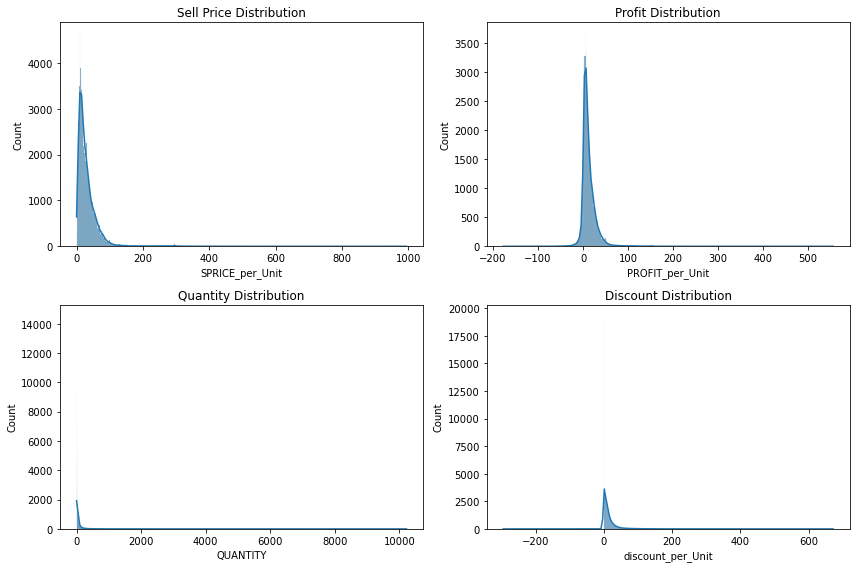

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution Plots
plt.figure(figsize=(12, 8))  # Adjusted the figure size for better layout

plt.subplot(221)  # Subplot in the first row, first column
sns.histplot(highest_profit_per_brand_state_store['SPRICE_per_Unit'], kde=True)
plt.title('Sale Price Distribution')

plt.subplot(222)  # Subplot in the first row, second column
sns.histplot(highest_profit_per_brand_state_store['PROFIT_per_Unit'], kde=True)
plt.title('Profit Distribution')

plt.subplot(223)  # Subplot in the second row, first column
sns.histplot(highest_profit_per_brand_state_store['QUANTITY'], kde=True)
plt.title('Quantity Distribution')

plt.subplot(224)  # Subplot in the second row, second column
sns.histplot(highest_profit_per_brand_state_store['discount_per_Unit'], kde=True)
plt.title('Discount Distribution')

plt.tight_layout()
plt.show()


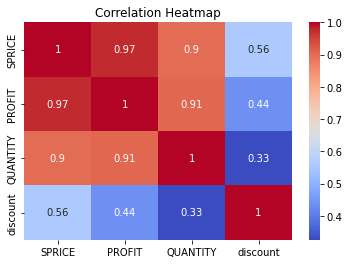

In [77]:
# Heatmap
corr_matrix = highest_profit_per_brand_state_store[['SPRICE', 'PROFIT', 'QUANTITY', 'discount']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

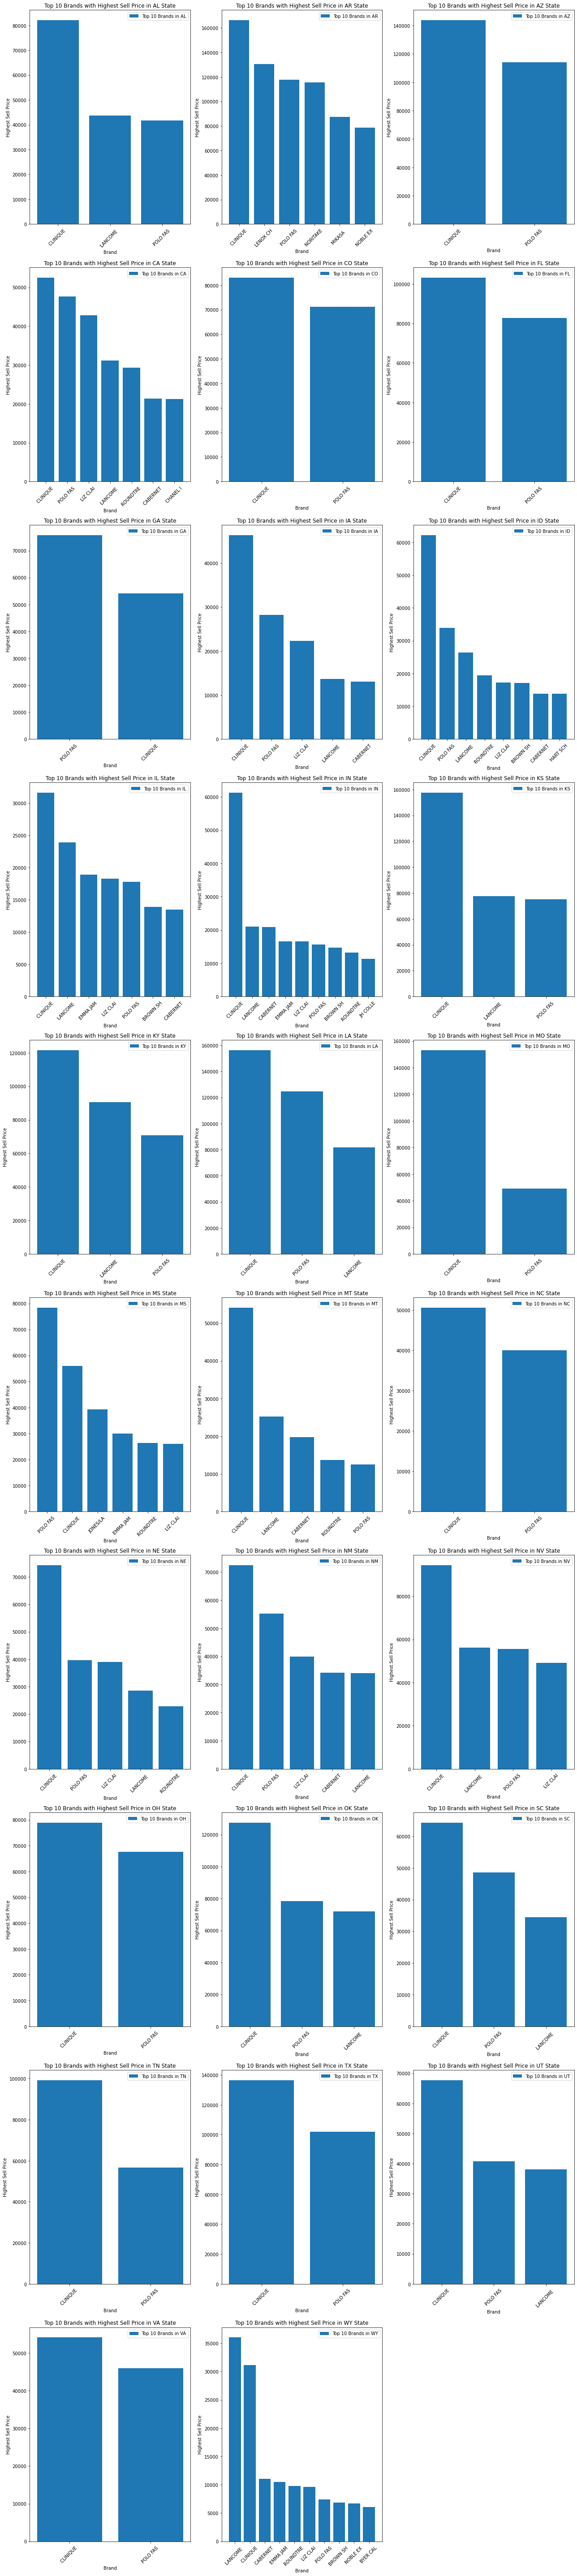

In [127]:
# Top brands with highest Sale price in each state

# Get a list of unique states
states = highest_profit_per_brand_state_store['STATE'].unique()

# Define the number of subplots per row
subplots_per_row = 3

# Calculate the number of rows needed
num_rows = int(np.ceil(len(states) / subplots_per_row))

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(18, 8 * num_rows))

# Flatten the axes array
axes = axes.flatten()

for i, state in enumerate(states):
    state_data = highest_profit_per_brand_state_store[highest_profit_per_brand_state_store['STATE'] == state]

    # Select the top 10 brands with the highest profit within the state
    top_brands = state_data.nlargest(10, 'SPRICE')

    # Plot the highest profit for each of the top 10 brands within the state
    ax = axes[i]
    ax.bar(top_brands['BRAND'], top_brands['SPRICE'], label=f'Top {10} Brands in {state}')

    # Set labels and title
    ax.set_xlabel('Brand')
    ax.set_ylabel('Highest Sale Price')
    ax.set_title(f'Top {10} Brands with Highest Sale Price in {state} State')

    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

    # Add a legend
    ax.legend()

# Hide empty subplots
for i in range(len(states), num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# Adjust layout and spacing
plt.tight_layout()
plt.show()

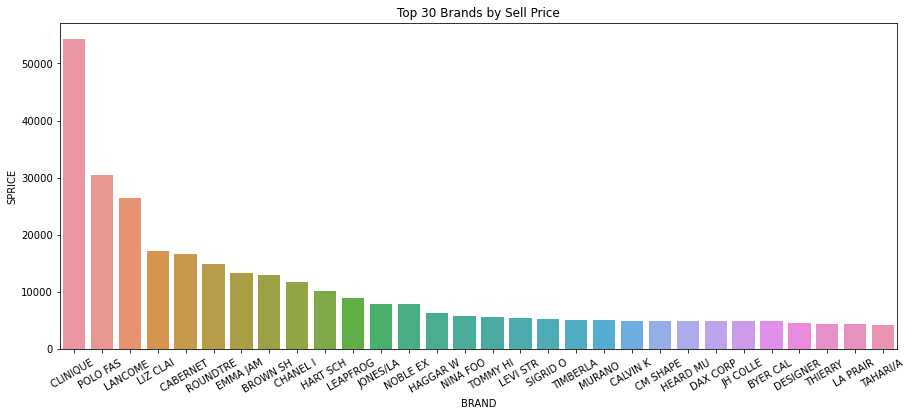

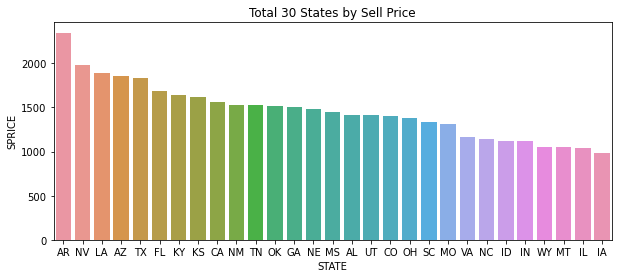

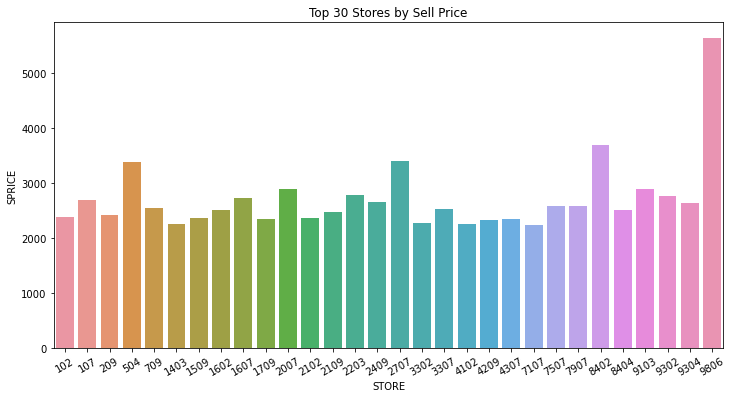

In [128]:
# Bar Plot: Top 30 Brands by Sale Price
brand_discount = highest_profit_per_brand_state_store.groupby('BRAND')['SPRICE'].mean().reset_index()
brand_discount = brand_discount.nlargest(30, 'SPRICE')  # Select the top 30 brands by discount

plt.figure(figsize=(15, 6))
sns.barplot(x='BRAND', y='SPRICE', data=brand_discount)
plt.title('Top 30 Brands by Sale Price')
plt.xticks(rotation=30)
plt.show()

# Bar Plot: Total Discount by State
state_discount = highest_profit_per_brand_state_store.groupby('STATE')['SPRICE'].mean().reset_index()
state_discount = state_discount.nlargest(30, 'SPRICE')  # Select the top 30 brands by discount
plt.figure(figsize=(10, 4))
sns.barplot(x='STATE', y='SPRICE', data=state_discount)
plt.title('Total 30 States by Sale Price')
plt.show()

# Bar Plot: Top 30 Stores by Total Discount
store_discount = highest_profit_per_brand_state_store.groupby('STORE')['SPRICE'].mean().reset_index()
store_discount = store_discount.nlargest(30, 'SPRICE')  # Select the top 30 stores by discount
plt.figure(figsize=(12, 6))
sns.barplot(x='STORE', y='SPRICE', data=store_discount)
plt.title('Top 30 Stores by Sale Price')
plt.xticks(rotation=30)
plt.show()


# # Bar Plot: Top 30 Brands by Sale Price
# brand_discount = highest_profit_per_brand_state_store.groupby('BRAND')[['SPRICE_per_Unit','QUANTITY']].mean().reset_index()
# brand_discount['SPRICE_per_Unit'] = brand_discount['SPRICE_per_Unit'] / brand_discount['QUANTITY']
# brand_discount = brand_discount.nlargest(30, 'SPRICE_per_Unit')  # Select the top 30 brands by discount

# plt.figure(figsize=(15, 6))
# sns.barplot(x='BRAND', y='SPRICE_per_Unit', data=brand_discount)
# plt.title('Top 30 Brands by Sale Price')
# plt.xticks(rotation=30)
# plt.show()



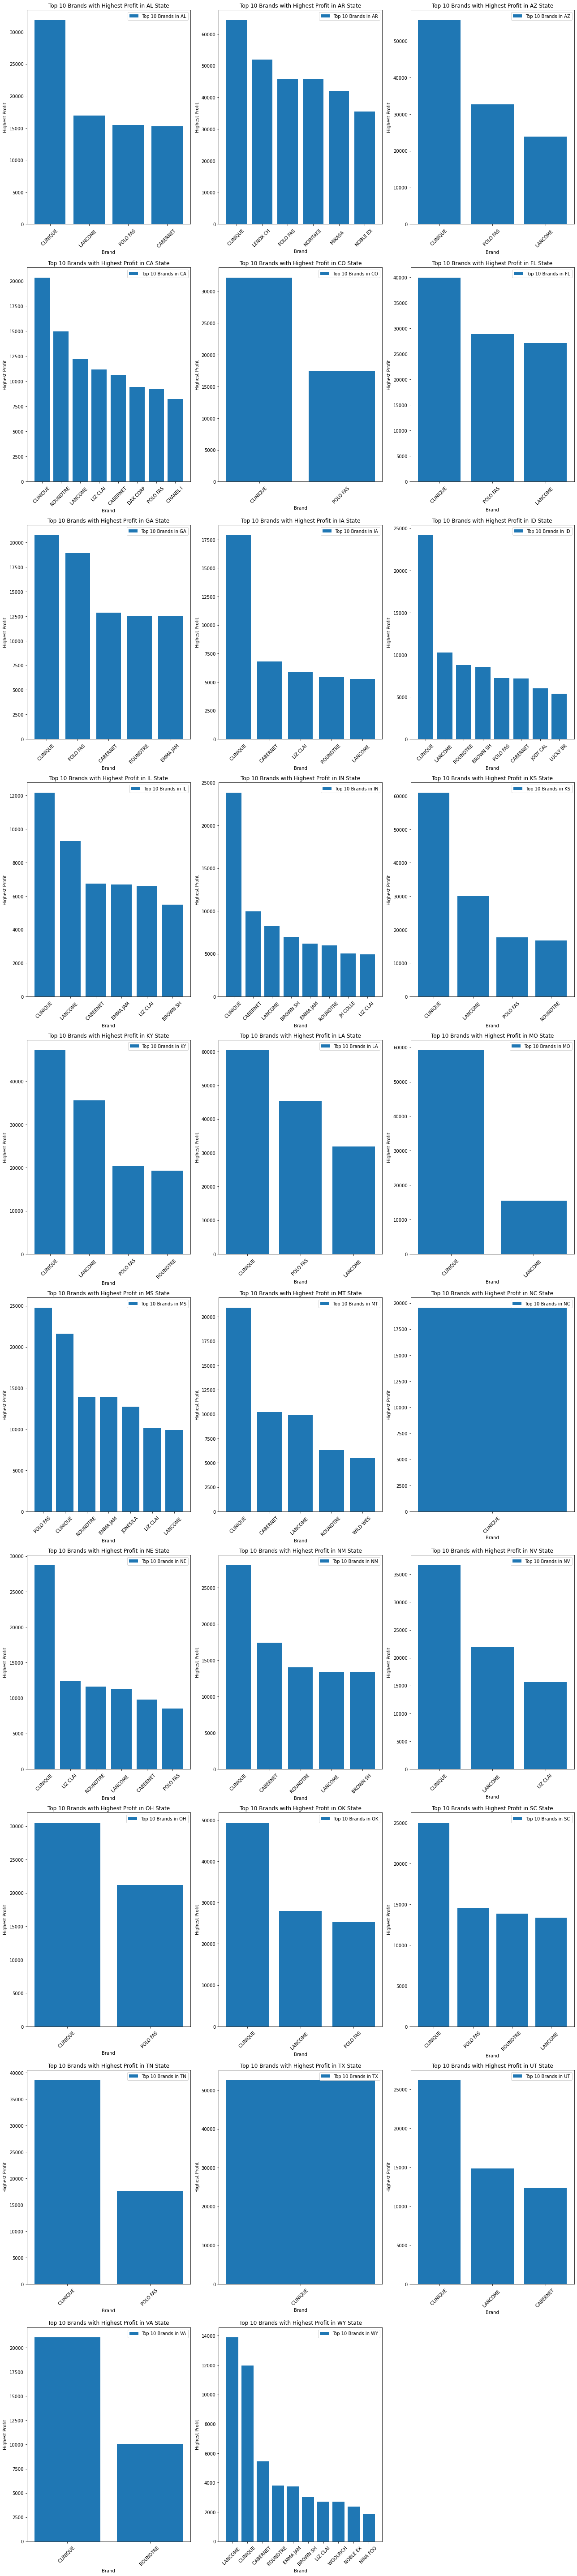

In [124]:
import numpy as np
# Top brands with highest PROFIT in each state

# Get a list of unique states
states = highest_profit_per_brand_state_store['STATE'].unique()

# Define the number of subplots per row
subplots_per_row = 3

# Calculate the number of rows needed
num_rows = int(np.ceil(len(states) / subplots_per_row))

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(18, 8 * num_rows))

# Flatten the axes array
axes = axes.flatten()

for i, state in enumerate(states):
    state_data = highest_profit_per_brand_state_store[highest_profit_per_brand_state_store['STATE'] == state]

    # Select the top 10 brands with the highest profit within the state
    top_brands = state_data.nlargest(10, 'PROFIT')

    # Plot the highest profit for each of the top 10 brands within the state
    ax = axes[i]
    ax.bar(top_brands['BRAND'], top_brands['PROFIT'], label=f'Top {10} Brands in {state}')

    # Set labels and title
    ax.set_xlabel('Brand')
    ax.set_ylabel('Highest Profit')
    ax.set_title(f'Top {10} Brands with Highest Profit in {state} State')

    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

    # Add a legend
    ax.legend()

# Hide empty subplots
for i in range(len(states), num_rows * subplots_per_row):
    fig.delaxes(axes[i])

# Adjust layout and spacing
plt.tight_layout()
plt.show()


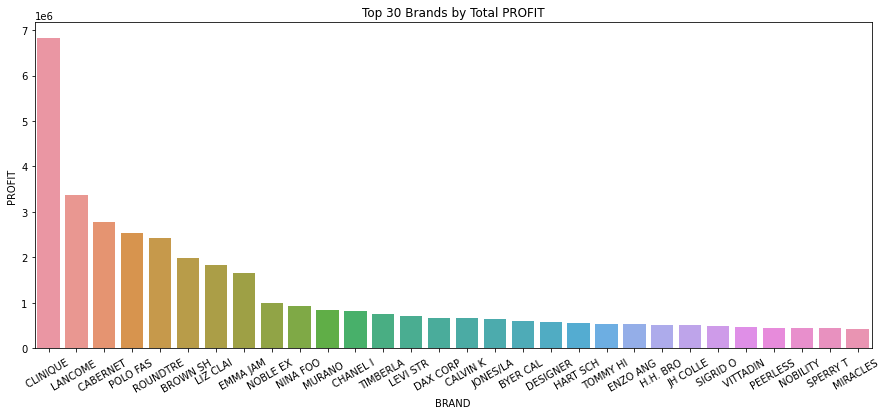

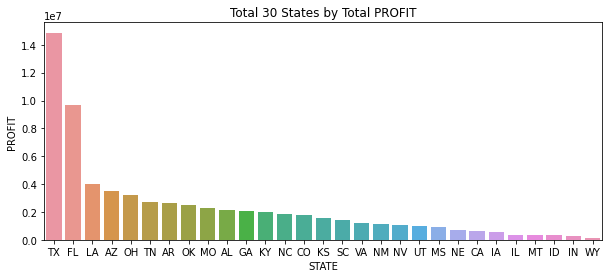

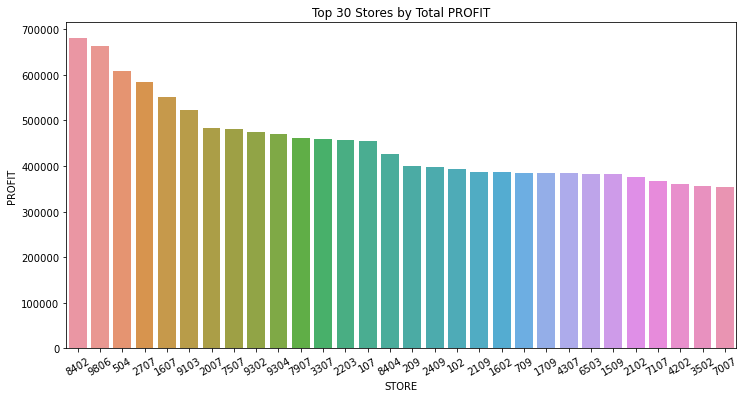

In [129]:
# Bar Plot: Top 30 Brands by Total Profit
brand_discount = highest_profit_per_brand_state_store.groupby('BRAND')['PROFIT'].sum().reset_index()
brand_discount = brand_discount.nlargest(30, 'PROFIT')  # Select the top 30 brands by discount

plt.figure(figsize=(15, 6))
sns.barplot(x='BRAND', y='PROFIT', data=brand_discount)
plt.title('Top 30 Brands by Total PROFIT')
plt.xticks(rotation=30)
plt.show()

# Bar Plot: Total Discount by State
state_discount = highest_profit_per_brand_state_store.groupby('STATE')['PROFIT'].sum().reset_index()
state_discount = state_discount.nlargest(30, 'PROFIT')  # Select the top 30 brands by discount
plt.figure(figsize=(10, 4))
sns.barplot(x='STATE', y='PROFIT', data=state_discount)
plt.title('Total 30 States by Total PROFIT')
plt.show()

# Bar Plot: Top 30 Stores by Total Discount
store_discount = highest_profit_per_brand_state_store.groupby('STORE')['PROFIT'].sum().reset_index()
store_discount = store_discount.nlargest(30, 'PROFIT')  # Select the top 30 stores by discount
plt.figure(figsize=(12, 6))
sns.barplot(x='STORE', y='PROFIT', data=store_discount, order=store_discount['STORE'])
plt.title('Top 30 Stores by Total PROFIT')
plt.xticks(rotation=30)
plt.show()


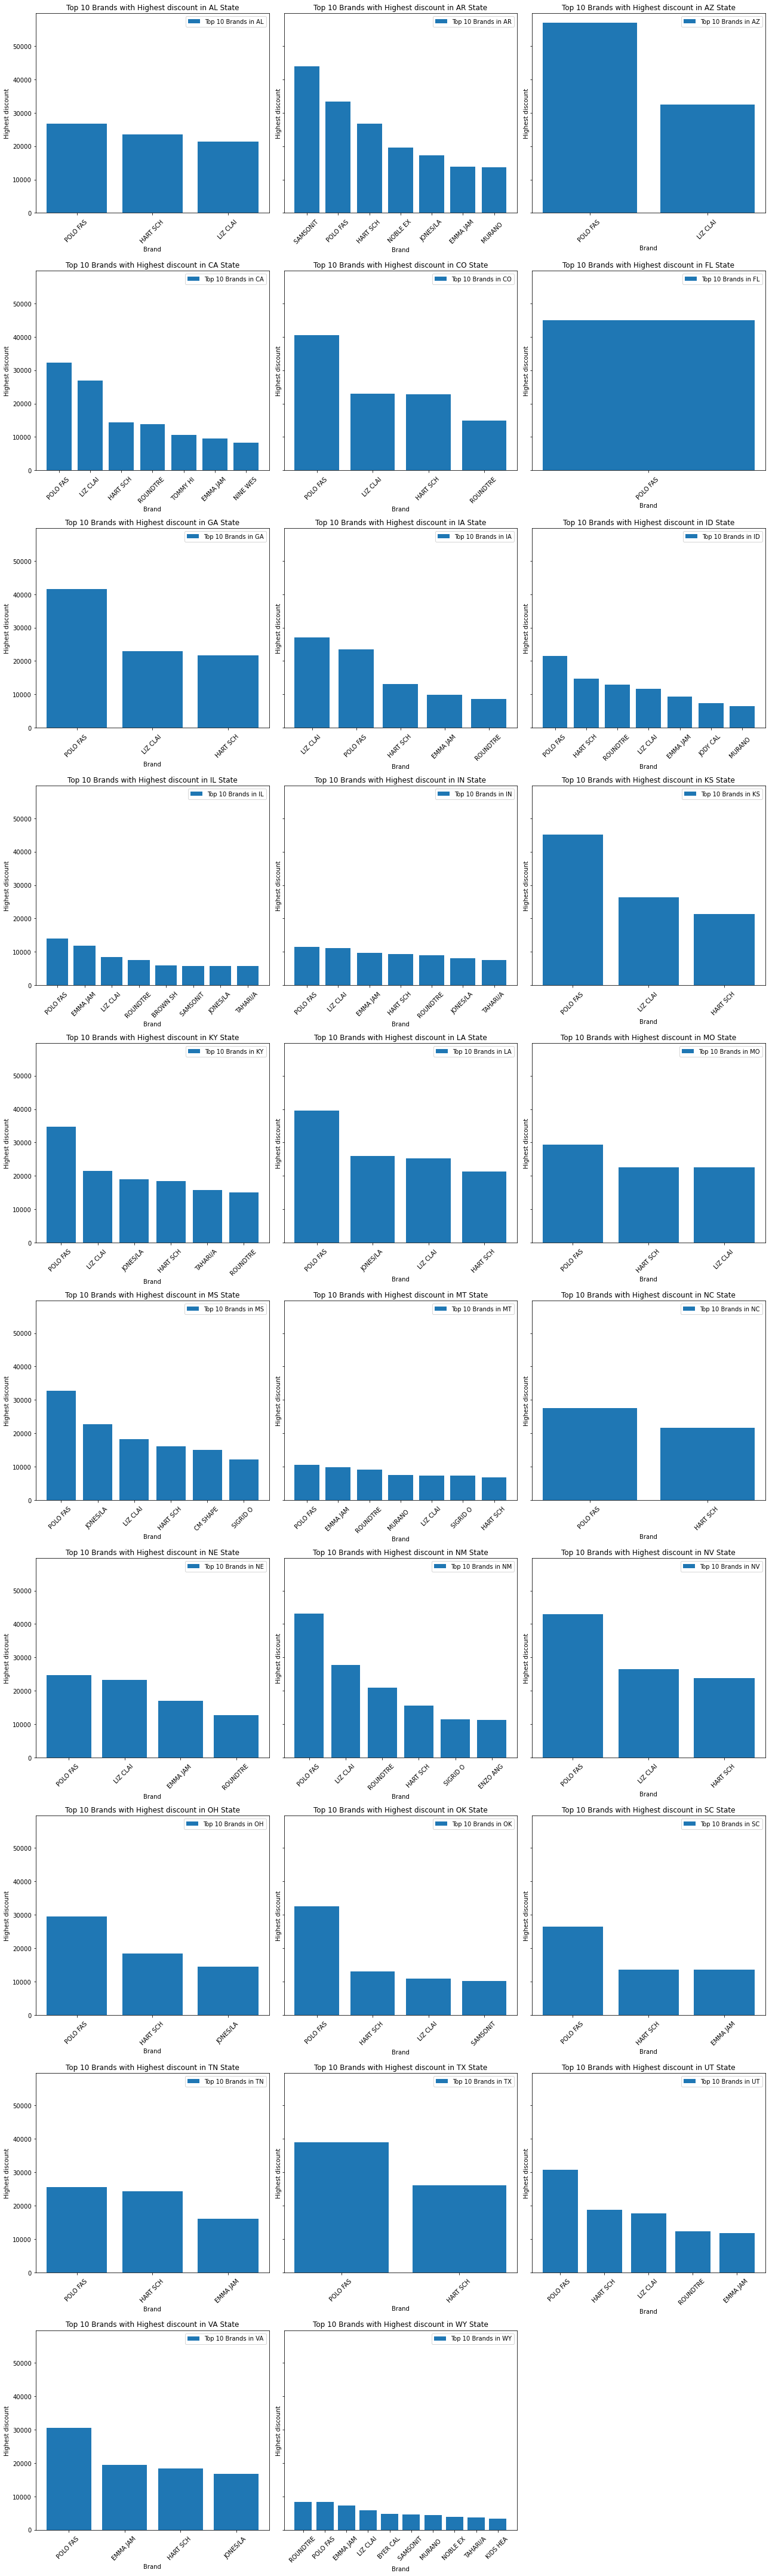

In [122]:
# Top brands with highest discount in each state

# Define the number of subplots per row
subplots_per_row = 3

# Calculate the number of rows needed
num_rows = int(np.ceil(len(states) / subplots_per_row))

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(18, 6 * num_rows), sharey=True)

for i, state in enumerate(states):
    state_data = highest_profit_per_brand_state_store[highest_profit_per_brand_state_store['STATE'] == state]

    # Select the top 10 brands with the highest discount within the state
    top_brands = state_data.nlargest(10, 'discount')

    # Calculate the row and column index for the subplot
    row_index, col_index = divmod(i, subplots_per_row)

    # Plot the highest discount for each of the top 10 brands within the state
    ax = axes[row_index, col_index]
    ax.bar(top_brands['BRAND'], top_brands['discount'], label=f'Top {10} Brands in {state}')

    # Set labels and title
    ax.set_xlabel('Brand')
    ax.set_ylabel('Highest discount')
    ax.set_title(f'Top {10} Brands with Highest discount in {state} State')

    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

    # Add a legend
    ax.legend()

# Hide empty subplots
for i in range(len(states), num_rows * subplots_per_row):
    fig.delaxes(axes.flatten()[i])

# Adjust layout and spacing
plt.tight_layout()
plt.show()



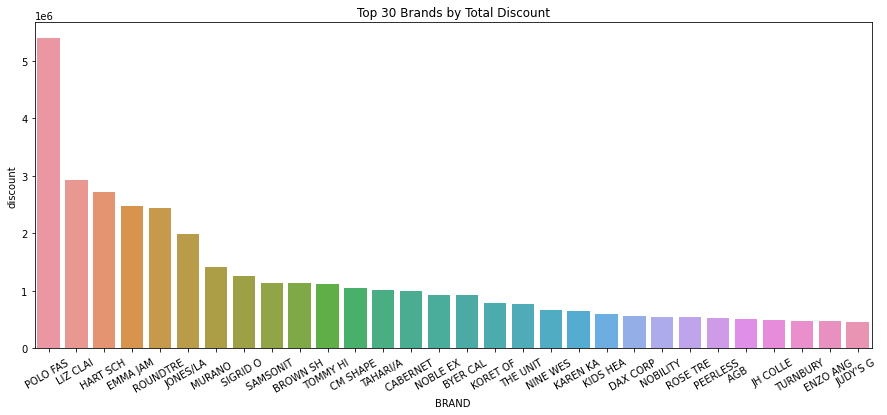

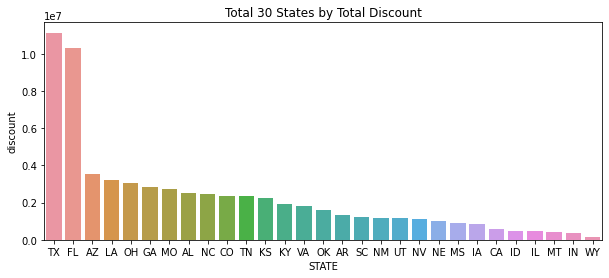

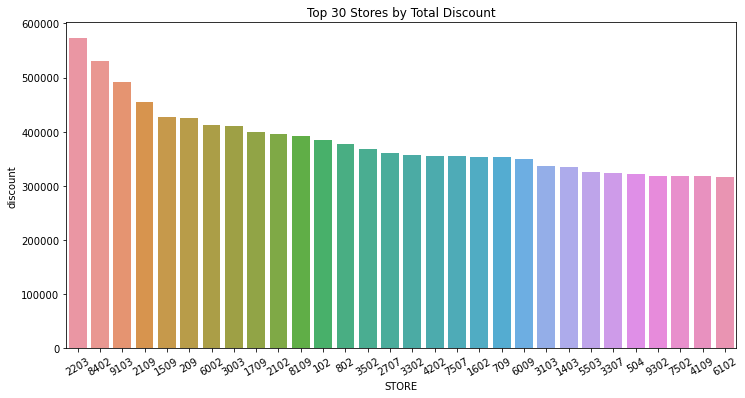

In [131]:
# Bar Plot: Top 30 Brands by Total Discount
brand_discount = highest_profit_per_brand_state_store.groupby('BRAND')['discount'].sum().reset_index()
brand_discount = brand_discount.nlargest(30, 'discount')  # Select the top 30 brands by discount

plt.figure(figsize=(15, 6))
sns.barplot(x='BRAND', y='discount', data=brand_discount)
plt.title('Top 30 Brands by Total Discount')
plt.xticks(rotation=30)
plt.show()

# Bar Plot: Total Discount by State
state_discount = highest_profit_per_brand_state_store.groupby('STATE')['discount'].sum().reset_index()
state_discount = state_discount.nlargest(30, 'discount')  # Select the top 30 brands by discount
plt.figure(figsize=(10, 4))
sns.barplot(x='STATE', y='discount', data=state_discount)
plt.title('Total 30 States by Total Discount')
plt.show()

# Bar Plot: Top 30 Stores by Total Discount
store_discount = highest_profit_per_brand_state_store.groupby('STORE')['discount'].sum().reset_index()
store_discount = store_discount.nlargest(30, 'discount')  # Select the top 30 stores by discount
plt.figure(figsize=(12, 6))
sns.barplot(x='STORE', y='discount', data=store_discount, order=store_discount['STORE'])
plt.title('Top 30 Stores by Total Discount')
plt.xticks(rotation=30)
plt.show()


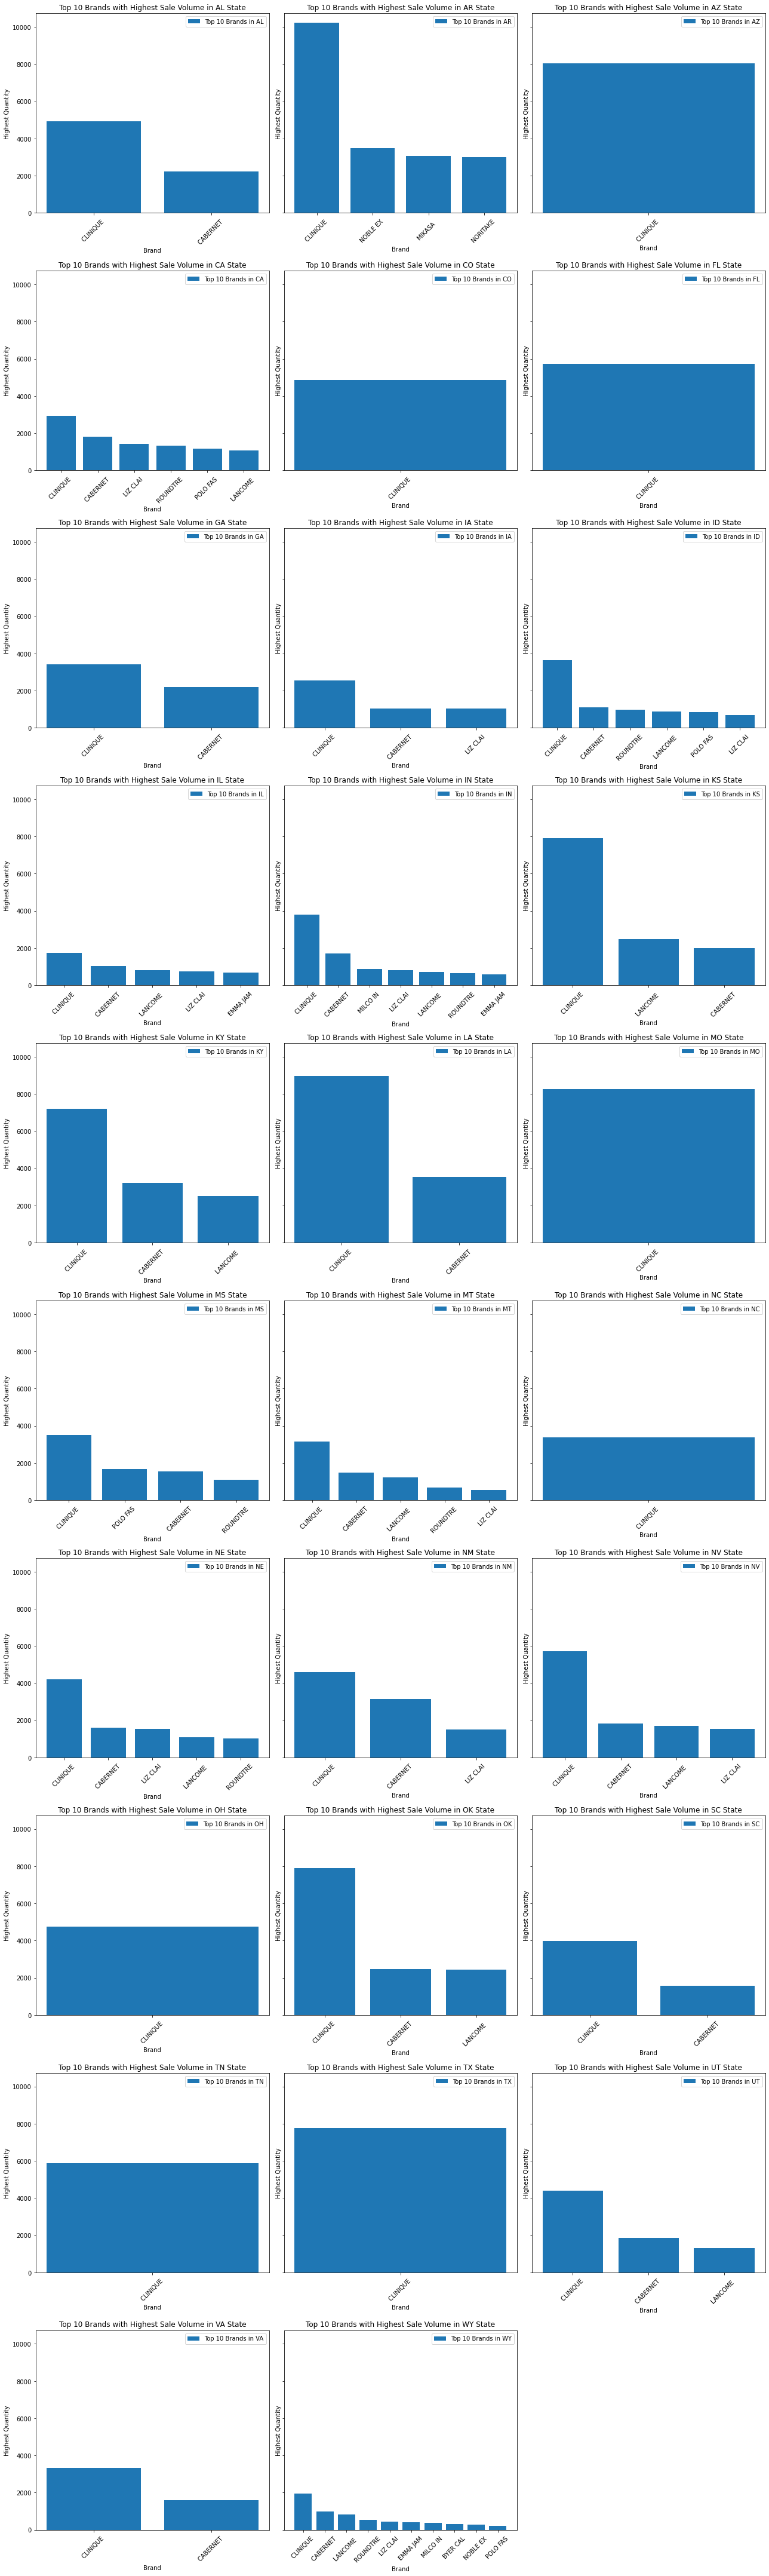

In [43]:
# Top brands with highest sale volume in each state

# Define the number of subplots per row
subplots_per_row = 3

# Calculate the number of rows needed
num_rows = int(np.ceil(len(states) / subplots_per_row))

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(18, 6 * num_rows), sharey=True)

for i, state in enumerate(states):
    state_data = highest_profit_per_brand_state_store[highest_profit_per_brand_state_store['STATE'] == state]

    # Select the top 10 brands with the highest sale volume within the state
    top_brands = state_data.nlargest(10, 'QUANTITY')

    # Calculate the row and column index for the subplot
    row_index, col_index = divmod(i, subplots_per_row)

    # Plot the highest sale volume for each of the top 10 brands within the state
    ax = axes[row_index, col_index]
    ax.bar(top_brands['BRAND'], top_brands['QUANTITY'], label=f'Top {10} Brands in {state}')

    # Set labels and title
    ax.set_xlabel('Brand')
    ax.set_ylabel('Highest Quantity')
    ax.set_title(f'Top {10} Brands with Highest Sale Volume in {state} State')

    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

    # Add a legend
    ax.legend()

# Hide empty subplots
for i in range(len(states), num_rows * subplots_per_row):
    fig.delaxes(axes.flatten()[i])

# Adjust layout and spacing
plt.tight_layout()
plt.show()


In [44]:
# Create a dictionary to store the top 20 brands with the highest sale volume for each state
state_top_brands = {}

for state in states:
    state_data = highest_profit_per_brand_state_store[highest_profit_per_brand_state_store['STATE'] == state]
    top_brands = list(state_data.nlargest(10, 'QUANTITY')['BRAND'])
    state_top_brands[state] = top_brands

# Find the common brands among all states
common_brands = set(state_top_brands[states[0]])  # Initialize with the brands from the first state

# Iterate through the states and find the common brands
for state in states:
    common_brands = common_brands.intersection(state_top_brands[state])

# Count the occurrences of each brand in the common brands set
brand_counts = Counter(brand for state in states for brand in state_top_brands[state])

# Find the most common brands
most_common_brands = [brand for brand, _ in brand_counts.most_common(5)]

# Print the first five most common brands
print("Most Common Brands That Have High Sale Volume:")
for rank, brand in enumerate(most_common_brands, start=1):
    print(f"{rank} - {brand}")


Most Common Brands That Have High Sale Volume:
1 - CLINIQUE 
2 - CABERNET 
3 - LANCOME  
4 - LIZ CLAI 
5 - ROUNDTRE 


The first five most common brands that have high sale volumes are CLINIQUE, CABERNET, LANCOME, LIZ CLAI, and ROUNDTRE.

#### Scatter Plot Matrix:

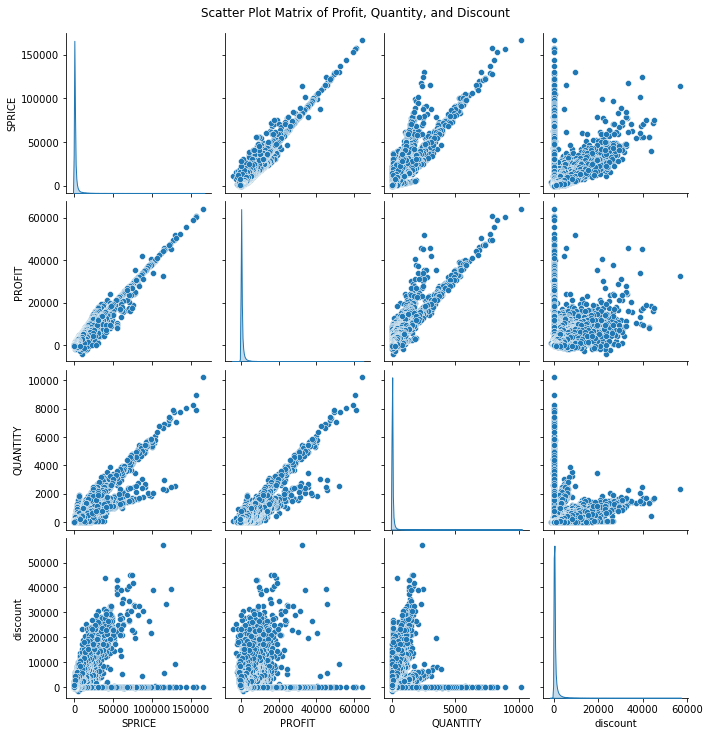

In [120]:
import seaborn as sns

# Select the relevant columns from your DataFrame
data_to_plot = highest_profit_per_brand_state_store[['SPRICE', 'PROFIT', 'QUANTITY', 'discount']]

# Create a Scatter Plot Matrix using Seaborn
scatter_plot_matrix = sns.pairplot(data_to_plot, diag_kind='kde', markers='o')

# Add a title to the Scatter Plot Matrix
scatter_plot_matrix.fig.suptitle("Scatter Plot Matrix of Profit, Quantity, and Discount", y=1.02)

# Display the plot
plt.show()


As quantity increases, profit increases. 

## Models

#### Prediction for Sale price based on QUANTITY, discount, BRAND, and STATE:

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Assuming you have a DataFrame named 'highest_profit_per_brand_state_store' with your data
X = highest_profit_per_brand_state_store[['QUANTITY', 'discount', 'BRAND', 'STATE']]
y = highest_profit_per_brand_state_store['SPRICE']

# Define which features need one-hot encoding
categorical_features = ['BRAND', 'STATE']
numeric_features = ['QUANTITY', 'discount']

# Create a transformer that will apply one-hot encoding to categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer to apply transformations to different feature sets
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Pass through the numeric features
)

# Split your data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model within a pipeline
regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__normalize': [True, False]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=regression_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing set
y_pred = best_model.predict(X_test)

# Evaluate the best model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Best Model Mean Squared Error: {mse}")
print(f"Best Model R-squared: {r2}")
print(f"Best Model Mean Absolute Error: {mae}")


Best Model Mean Squared Error: 1391879.7457001992
Best Model R-squared: 0.9472890235803216
Best Model Mean Absolute Error: 476.2383594656255


In [84]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a column transformer to apply transformations to different feature sets
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

# Split your data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.1, 0.01, 0.001],
    'regressor__max_depth': [3, 4, 5]
}

# Create a GradientBoostingRegressor with the preprocessor
gradient_boosting_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Create a GridSearchCV object to search for the best hyperparameters
grid_search = GridSearchCV(estimator=gradient_boosting_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing set
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Best Model Mean Squared Error: {mse}")
print(f"Best Model R-squared: {r2}")
print(f"Best Model Mean Absolute Error: {mae}")


Best Model Mean Squared Error: 690705.4828516493
Best Model R-squared: 0.9738427399838191
Best Model Mean Absolute Error: 330.5421972796953


In [85]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest Regressor model within a pipeline
random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

random_forest_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = random_forest_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")



Mean Squared Error: 623077.1446247447
R-squared: 0.9764038489823462
Mean Absolute Error: 210.79702847105818


#### Prediction for discount based on QUANTITY, PROFIT, BRAND, and STATE:

In [57]:
# Assuming you have a DataFrame named 'highest_profit_per_brand_state_store' with your data
X = highest_profit_per_brand_state_store[['QUANTITY', 'PROFIT', 'BRAND', 'STATE']]
y = highest_profit_per_brand_state_store['discount']

# Define which features need one-hot encoding
categorical_features = ['BRAND', 'STATE']
numeric_features = ['QUANTITY', 'PROFIT']

# Create a transformer that will apply one-hot encoding to categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer to apply transformations to different feature sets
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Pass through the numeric features
)

# Split your data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model within a pipeline
regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__normalize': [True, False]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=regression_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing set
y_pred = best_model.predict(X_test)

# Evaluate the best model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Best Model Mean Squared Error: {mse}")
print(f"Best Model R-squared: {r2}")
print(f"Best Model Mean Absolute Error: {mae}")

Best Model Mean Squared Error: 893925.1438350071
Best Model R-squared: 0.7080161134946139
Best Model Mean Absolute Error: 346.3126794717499


In [59]:
# Assuming you have a DataFrame named 'highest_profit_per_brand_state_store' with your data
X = highest_profit_per_brand_state_store[['QUANTITY', 'PROFIT', 'BRAND', 'STATE']]
y = highest_profit_per_brand_state_store['discount']

# Define which features need one-hot encoding
categorical_features = ['BRAND', 'STATE']
numeric_features = ['QUANTITY', 'PROFIT']

# Create a transformer that will apply one-hot encoding to categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer to apply transformations to different feature sets
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

# Split your data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.1, 0.01, 0.001],
    'regressor__max_depth': [3, 4, 5]
}

# Create a GradientBoostingRegressor with the preprocessor
gradient_boosting_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Create a GridSearchCV object to search for the best hyperparameters
grid_search = GridSearchCV(estimator=gradient_boosting_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing set
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Best Model Mean Squared Error: {mse}")
print(f"Best Model R-squared: {r2}")
print(f"Best Model Mean Absolute Error: {mae}")

Best Model Mean Squared Error: 199329.71633173432
Best Model R-squared: 0.9348926857333166
Best Model Mean Absolute Error: 198.91569294163224


In [60]:
# Create and train the Random Forest Regressor model within a pipeline
random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

random_forest_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = random_forest_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 135508.0321631375
R-squared: 0.9557388421652983
Mean Absolute Error: 117.86812573844139


#### Prediction for QUANTITY based on dicount, PROFIT, BRAND, and STATE:

In [61]:
# Assuming you have a DataFrame named 'highest_profit_per_brand_state_store' with your data
X = highest_profit_per_brand_state_store[['discount', 'PROFIT', 'BRAND', 'STATE']]
y = highest_profit_per_brand_state_store['QUANTITY']

# Define which features need one-hot encoding
categorical_features = ['BRAND', 'STATE']
numeric_features = ['PROFIT', 'discount']

# Create a transformer that will apply one-hot encoding to categorical features
categorical_transformer = Pipeline(ste ps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer to apply transformations to different feature sets
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Pass through the numeric features
)

# Split your data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model within a pipeline
regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__normalize': [True, False]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=regression_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing set
y_pred = best_model.predict(X_test)

# Evaluate the best model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Best Model Mean Squared Error: {mse}")
print(f"Best Model R-squared: {r2}")
print(f"Best Model Mean Absolute Error: {mae}")

Best Model Mean Squared Error: 3832.479124333375
Best Model R-squared: 0.9380416912485268
Best Model Mean Absolute Error: 22.77668318652504


In [62]:
# Create a transformer that will apply one-hot encoding to categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer to apply transformations to different feature sets
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

# Split your data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.1, 0.01, 0.001],
    'regressor__max_depth': [3, 4, 5]
}

# Create a GradientBoostingRegressor with the preprocessor
gradient_boosting_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Create a GridSearchCV object to search for the best hyperparameters
grid_search = GridSearchCV(estimator=gradient_boosting_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing set
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Best Model Mean Squared Error: {mse}")
print(f"Best Model R-squared: {r2}")
print(f"Best Model Mean Absolute Error: {mae}")

Best Model Mean Squared Error: 829.2310035057027
Best Model R-squared: 0.9865941212268345
Best Model Mean Absolute Error: 11.86027240332083


In [63]:
# Create and train the Random Forest Regressor model within a pipeline
random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

random_forest_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = random_forest_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 879.055550428493
R-squared: 0.9857886257338405
Mean Absolute Error: 7.956133210391705
